In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load data
df = pd.read_csv("/Users/pmadatal/Downloads/kickstarter_projects.csv")


In [3]:
#By using the Attributes Launched and Deadline we are adding a Duration_in_days attribute.

In [4]:
df['Launched'] = pd.to_datetime(df['Launched'], format='%Y-%m-%d %H:%M:%S')
df['Deadline'] = pd.to_datetime(df['Deadline'], format='%Y-%m-%d')
# calculate the time difference between 'deadline' and 'launched' in days
df['Duration_in_Days'] = (df['Deadline'] - df['Launched']).dt.days

In [5]:
df.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Duration_in_Days
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,39
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,87
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,8
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,79
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,28


In [6]:
df.describe()

,ID,Goal,Pledged,Backers,Duration_in_Days
count,3.748530e+05,3.748530e+05,3.748530e+05,374853.000000,374853.000000
mean,1.074656e+09,4.586378e+04,9.121073e+03,106.690359,33.217192
std,6.191377e+08,1.158778e+06,9.132054e+04,911.718520,12.804795
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,5.380728e+08,2.000000e+03,3.100000e+01,2.000000,29.000000
50%,1.075300e+09,5.500000e+03,6.250000e+02,12.000000,29.000000
75%,1.610149e+09,1.600000e+04,4.051000e+03,57.000000,36.000000
max,2.147476e+09,1.663614e+08,2.033899e+07,219382.000000,91.000000


In [7]:
df.shape

(374853, 12)

In [8]:
df.dtypes

ID                           int64
Name                        object
Category                    object
Subcategory                 object
Country                     object
Launched            datetime64[ns]
Deadline            datetime64[ns]
Goal                         int64
Pledged                      int64
Backers                      int64
State                       object
Duration_in_Days             int64
dtype: object

In [9]:
df = df.head(20000)

df2 = df[df["State"].isin(["Failed", "Successful"])]

df2 = df2.drop(columns=["ID", "Launched", "Deadline"])

le = LabelEncoder()
df2["State"] = le.fit_transform(df2["State"])

X = df2.drop(columns=["State"])
y = df2["State"]

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [("OneHotEncoder", oh_transformer, cat_features),
     ("StandardScaler", numeric_transformer, num_features)]
)
X = preprocessor.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

accuracy1 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy1)

Accuracy: 0.9646478487256782


In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


df2 = df[df["State"].isin(["Failed", "Successful"])]

df2 = df2.drop(columns=["ID", "Launched", "Deadline"])

le = LabelEncoder()
df2["State"] = le.fit_transform(df2["State"])

X = df2.drop(columns=["State"])
y = df2["State"]

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [("OneHotEncoder", oh_transformer, cat_features),
     ("StandardScaler", numeric_transformer, num_features)]
)
X = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression(max_iter=10000, random_state=42)
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

accuracy2 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy2)


Accuracy: 0.8994244998629761


In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


df2 = df[df["State"].isin(["Failed", "Successful"])]

df2 = df2.drop(columns=["ID", "Launched", "Deadline"])

le = LabelEncoder()
df2["State"] = le.fit_transform(df2["State"])

X = df2.drop(columns=["State"])
y = df2["State"]

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [("OneHotEncoder", oh_transformer, cat_features),
     ("StandardScaler", numeric_transformer, num_features)]
)
X = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(random_state=42)
svm.fit(X_train, y_train)

predictions = svm.predict(X_test)

accuracy3 = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy3)


Accuracy: 0.8901068785968759


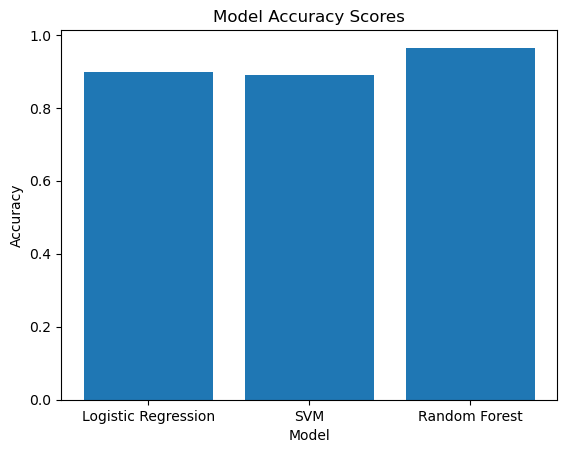

In [12]:
import matplotlib.pyplot as plt

accuracies = [accuracy2, accuracy3, accuracy1]

model_names = ['Logistic Regression', 'SVM', 'Random Forest']

plt.bar(model_names, accuracies)

plt.title('Model Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()


/Users/pmadatal/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


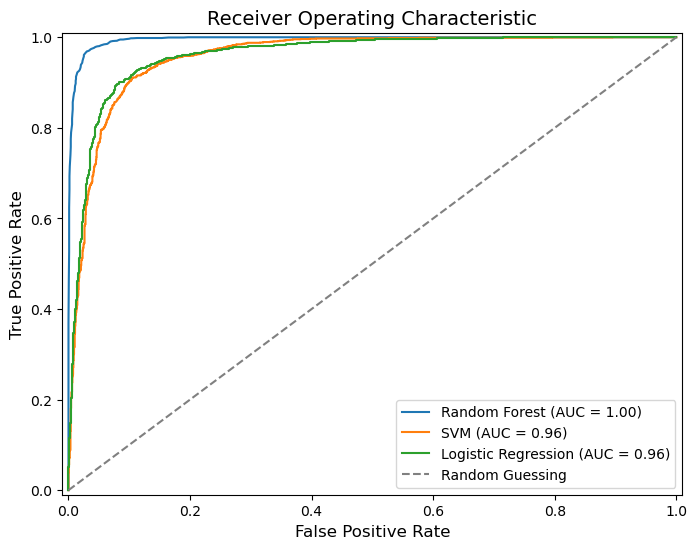

In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

df2 = df[df["State"].isin(["Failed", "Successful"])]

df2 = df2.drop(columns=["ID", "Launched", "Deadline"])

le = LabelEncoder()
df2["State"] = le.fit_transform(df2["State"])

X = df2.drop(columns=["State"])
y = df2["State"]

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [("OneHotEncoder", oh_transformer, cat_features),     ("StandardScaler", numeric_transformer, num_features)]
)
X = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [("Random Forest", RandomForestClassifier(random_state=42)),          ("SVM", SVC(kernel="rbf", probability=True, random_state=42)),          ("Logistic Regression", LogisticRegression(random_state=42))]

plt.figure(figsize=(8, 6))

for name, model in models:
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random Guessing')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.show()


In [14]:
from sklearn.metrics import precision_score

y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred, pos_label=1)

print("Precision:", precision)


Precision: 0.9320388349514563


In [15]:
from sklearn.metrics import recall_score
y_pred = model.predict(X_test)
recall = recall_score(y_test, y_pred, pos_label=1)
print("Recall:", recall)


Recall: 0.8571428571428571


In [16]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_test)
f1_score = f1_score(y_test, y_pred, pos_label=1)

print("F1 score:", f1_score)


F1 score: 0.8930232558139534


In [17]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:")
print(cm)


Confusion matrix:
[[1745  112]
 [ 256 1536]]


In [18]:
#Feature Importance of Category

In [20]:
import numpy as np
importances = rf.feature_importances_
oh_features = preprocessor.named_transformers_["OneHotEncoder"].get_feature_names_out(cat_features)
numeric_features = num_features
features = np.concatenate((oh_features, numeric_features))

feature_importances = dict(zip(features, importances))
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

excluded_features = ["Goal", "Pledged", "Backers", "Name", "ID","Subcategory","Country"]
for feature, importance in sorted_importances:
    if feature.split("_")[0] not in excluded_features:
        print(f"{feature}: {importance:.6f}")


Duration_in_Days: 0.028692
Category_Music: 0.003065
Category_Film & Video: 0.001580
Category_Theater: 0.001444
Category_Publishing: 0.001373
Category_Technology: 0.000871
Category_Fashion: 0.000776
Category_Dance: 0.000754
Category_Design: 0.000713
Category_Art: 0.000711
Category_Games: 0.000502
Category_Food: 0.000467
Category_Photography: 0.000356
Category_Journalism: 0.000285
Category_Comics: 0.000274
Category_Crafts: 0.000171


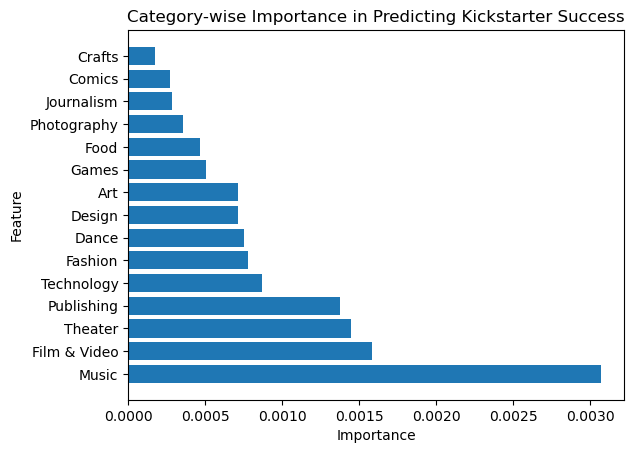

In [21]:
import matplotlib.pyplot as plt
feature_names = [feature.split("_")[1] for feature, importance in sorted_importances if feature.split("_")[0] == "Category"]
importances = [importance for feature, importance in sorted_importances if feature.split("_")[0] == "Category"]

plt.barh(feature_names, importances)
plt.title("Category-wise Importance in Predicting Kickstarter Success")
plt.style.use('default')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [22]:
#Feature Importance of Sub_Category

In [23]:
importances = rf.feature_importances_
oh_features = preprocessor.named_transformers_["OneHotEncoder"].get_feature_names_out(cat_features)
numeric_features = num_features
features = np.concatenate((oh_features, numeric_features))

feature_importances = dict(zip(features, importances))
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
excluded_features = ["Goal", "Pledged", "Backers", "Name", "ID","Category","Country"]
for feature, importance in sorted_importances:
    if feature.split("_")[0] not in excluded_features:
        print(f"{feature}: {importance:.6f}")


Duration_in_Days: 0.028692
Subcategory_Theater: 0.001472
Subcategory_Documentary: 0.001289
Subcategory_Software: 0.001272
Subcategory_Hip-Hop: 0.001050
Subcategory_Music: 0.001037
Subcategory_Fiction: 0.000951
Subcategory_Rock: 0.000847
Subcategory_Product Design: 0.000834
Subcategory_Indie Rock: 0.000793
Subcategory_Country & Folk: 0.000750
Subcategory_Children's Books: 0.000734
Subcategory_Shorts: 0.000717
Subcategory_Film & Video: 0.000714
Subcategory_Webseries: 0.000644
Subcategory_Fashion: 0.000615
Subcategory_Video Games: 0.000610
Subcategory_Dance: 0.000594
Subcategory_Nonfiction: 0.000547
Subcategory_Radio & Podcasts: 0.000542
Subcategory_Narrative Film: 0.000460
Subcategory_Animation: 0.000459
Subcategory_Art: 0.000439
Subcategory_Technology: 0.000428
Subcategory_Jazz: 0.000413
Subcategory_Electronic Music: 0.000402
Subcategory_Publishing: 0.000385
Subcategory_Pop: 0.000379
Subcategory_Food: 0.000367
Subcategory_Design: 0.000352
Subcategory_Performance Art: 0.000351
Subcategor

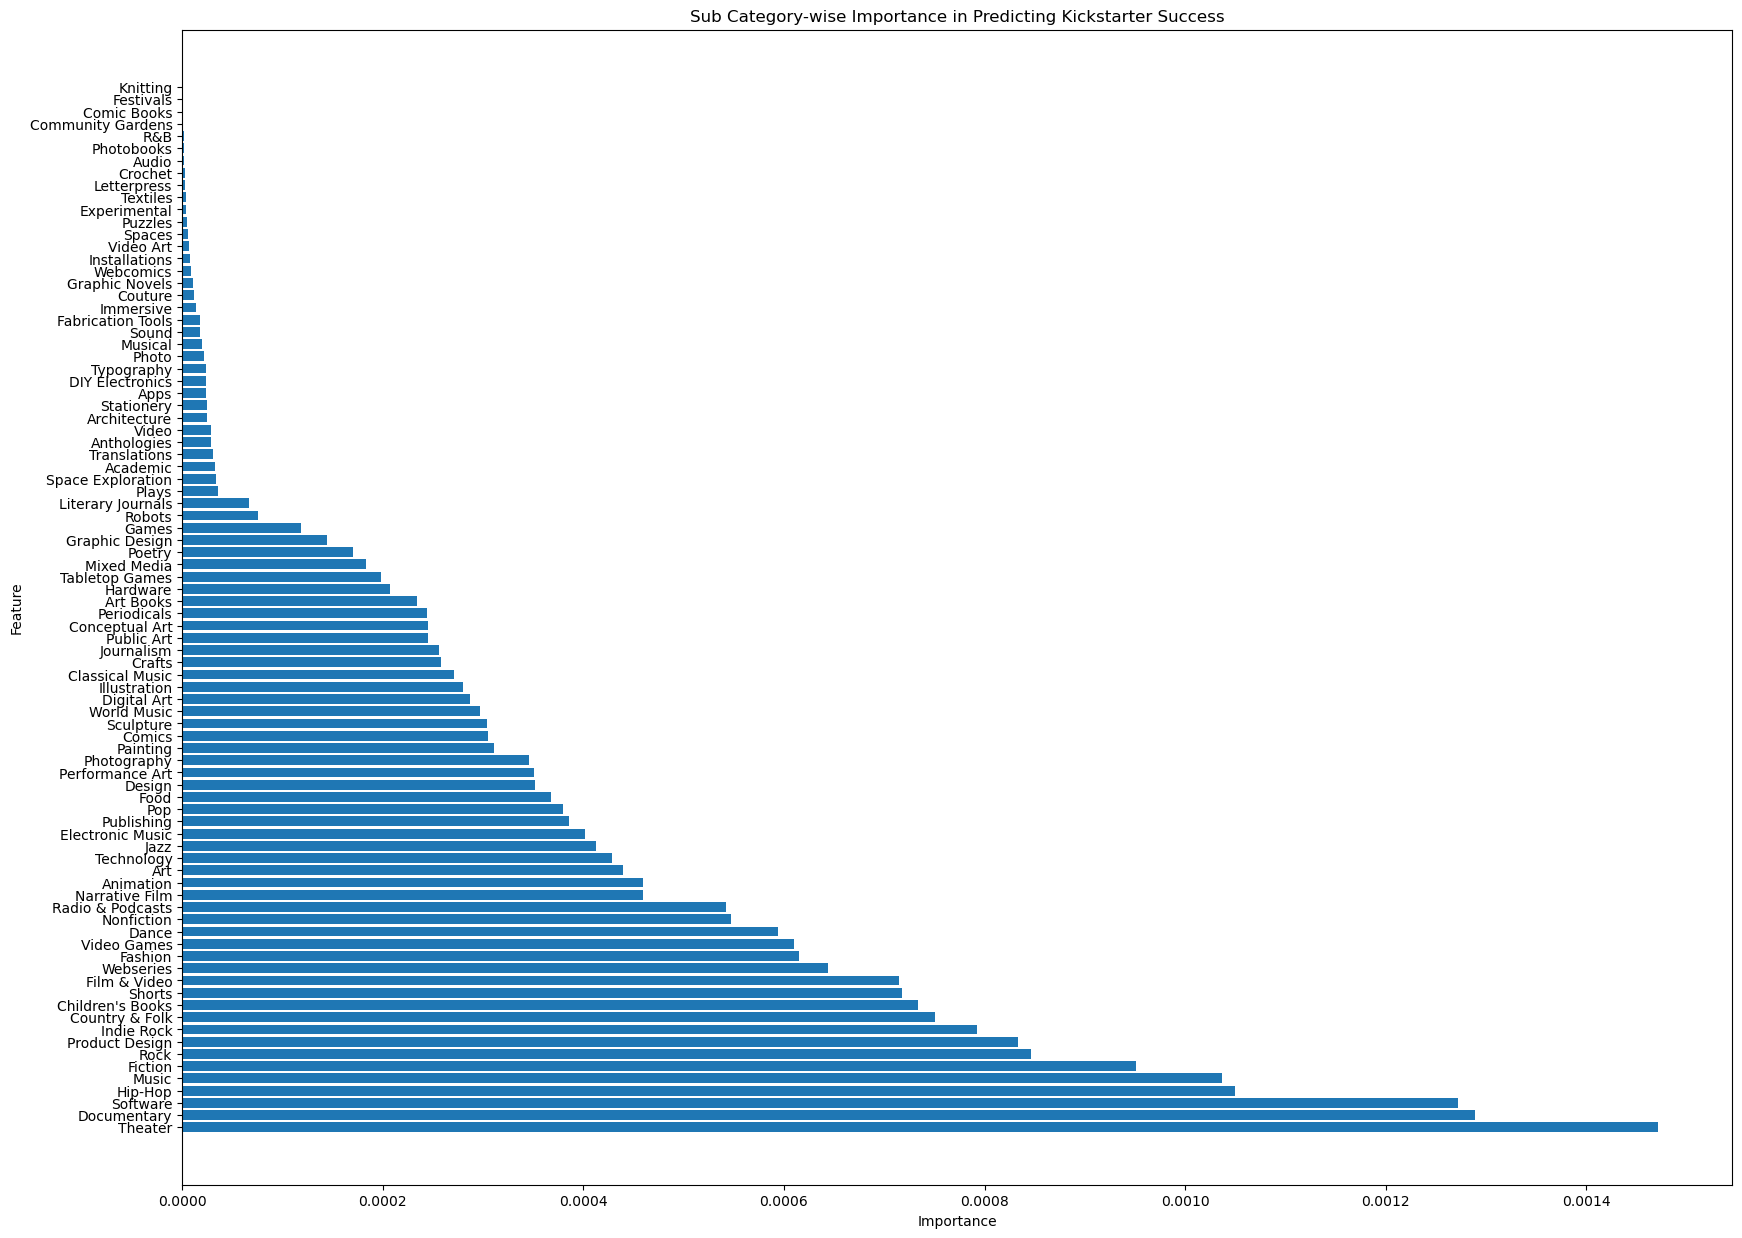

In [24]:
import matplotlib.pyplot as plt

feature_names = [feature.split("_")[1] for feature, importance in sorted_importances if feature.split("_")[0] == "Subcategory"]
importances = [importance for feature, importance in sorted_importances if feature.split("_")[0] == "Subcategory"]
fig, ax = plt.subplots(figsize=(20, 15))
ax.barh(feature_names, importances)

ax.set_title("Sub Category-wise Importance in Predicting Kickstarter Success")
ax.set_xlabel("Importance")
ax.set_ylabel("Feature")

plt.show()
